<a href="https://colab.research.google.com/github/reincarnateMin/pygame_tutorials/blob/master/%5BBaseline%5D_%ED%83%9C%EC%96%91%EA%B4%91_%EB%B0%9C%EC%A0%84%EB%9F%89_%EC%98%88%EC%B8%A1_%EB%B2%A0%EC%9D%B4%EC%8A%A4%EB%9D%BC%EC%9D%B8_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting



### install

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv] #] 생략 가능
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,877 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

### 구글 드라이브 연결

구글 드라이브와 연결하는 코드를 실행해줍니다. 구글 드라이브의 파일을 불러올 수 있습니다.

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (현재 위치 설정)

In [ ]:
# 태양광 발전량 data 파일이 저장된 경로를 현재 위치로 설정
%cd '/content/drive/MyDrive/data'

/content/drive/MyDrive/data


### 라이브러리 import

In [ ]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd
import numpy as np

# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트를 사용하기 위한 코드
plt.rc('font', family='NanumBarunGothic')

# [충남대] 태양광 발전량 예측 AI 경진대회  

# I. 데이터 살펴보기

데이터 분석을 하기 위해 가장 먼저 해야할 일이 무엇일까요?

바로 데이터를 살펴보는 일입니다.  
주어진 데이터를 살펴보며 데이터의 모양과 대략적인 내용을 파악하고, 무슨 분석이 가능한지 확인하여 분석의 방향을 잡는 과정이 필요합니다.

대회 페이지의 [데이터] 탭에서 압축 파일을 다운받아 압축을 풀어주었다면 현재 폴더 구조는 아래와 같을 것입니다.

(현재 위치)  
- baseline.ipynb
- dataset (폴더)
  - train.csv
  - test.csv
  - sample_submission.csv

이번 대회의 데이터는 총 3가지이며 모두 csv 파일입니다.
1. train.csv : 데이터 분석 모델을 학습(train)하기 위해 사용하는 데이터
2. test.csv : 데이터 분석 모델을 통해 정답을 예측하기 위해 사용하는 데이터
3. sample_submission.csv : 예측한 정답 값을 기록하여 제출하기 위한 샘플 정답 파일

train.csv : 훈련용 데이터 (1개 파일)
- ID : 각 행의 고유한 번호
- DHI : 수평면 산란일사량(Diffuse Horizontal Irradiance) 
- DNI : 법선면 직달일사량(Direct Normal Irradiance) 
- WS : 풍속(Wind Speed)
- RH : 상대습도(Relative Humidity)
- T : 기온(Temperature)
- TARGET : 태양광 발전량 (kW)


test.csv : 정답 예측용 데이터
- ID : 각 행의 고유한 번호
- DHI : 수평면 산란일사량(Diffuse Horizontal Irradiance) 
- DNI : 법선면 직달일사량(Direct Normal Irradiance) 
- WS : 풍속(Wind Speed)
- RH : 상대습도(Relative Humidity)
- T : 기온(Temperature)



sample_submission.csv : 정답제출 파일
- ID : 각 행의 고유한 번호
- TARGET : 태양광 발전량 (kW)

## 1. 데이터 준비

먼저 pandas 라이브러리의 `read_csv()` 함수를 이용해 분석에 사용할 데이터를 불러옵니다.

`read_csv()` 함수는 ('파일이 있는 위치/파일명.확장자명') 의 형식을 받아 데이터를 불러옵니다.

In [ ]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd

# train 데이터 불러오기
train = pd.read_csv('./train.csv')

# test 데이터 불러오기
test = pd.read_csv('./test.csv')

# sample_submission 불러오기
sample_submission = pd.read_csv('./sample_submission.csv')

## 2. 데이터 확인

이제 데이터가 어떻게 생겼는지 살펴봅시다.

처음 데이터를 살펴 볼 때에는 pandas의 **head()**, **tail()** 그리고 **info()** 메소드를 활용하여 데이터를 살펴보는 경우가 많습니다.

이는 데이터와 처음과 끝을 살펴봄으로서, **이상치나 결측치**와 같은 데이터를 살펴보기 위함입니다.

In [ ]:
# 우선 잘 불러와졌는지 확인합니다.
train

,ID,DHI,DNI,WS,RH,T,TARGET
0,1,0.315650,0.885087,3.129167,-0.563454,-0.106409,33.659014
1,2,0.075239,0.756084,3.068750,-1.030301,0.317479,20.747731
2,3,0.148714,0.628092,1.547917,-1.190128,0.411156,18.263065
3,4,0.821308,0.283800,3.020833,-0.218049,1.308111,21.072718
4,5,0.174578,0.592866,2.056250,0.286934,-0.312498,16.076963
...,...,...,...,...,...,...,...
725,726,0.501543,0.642224,2.918750,-1.219349,-0.094699,25.604709
726,727,0.082733,0.774102,3.110417,-0.612778,-0.563083,20.438856
727,728,0.587950,0.385512,2.704167,1.294474,0.839727,21.876819
728,729,0.816605,0.195044,1.656250,1.413581,0.811624,17.209349


`head()`와 `tail()` 메소드를 이용해 데이터의 처음과 끝을 확인해봅시다.

In [ ]:
# 데이터 처음(최상단) 5줄을 표시합니다.
train.head()

,ID,DHI,DNI,WS,RH,T,TARGET
0,1,0.315650,0.885087,3.129167,-0.563454,-0.106409,33.659014
1,2,0.075239,0.756084,3.068750,-1.030301,0.317479,20.747731
2,3,0.148714,0.628092,1.547917,-1.190128,0.411156,18.263065
3,4,0.821308,0.283800,3.020833,-0.218049,1.308111,21.072718
4,5,0.174578,0.592866,2.056250,0.286934,-0.312498,16.076963


In [ ]:
# 데이터 마지막(최하단) 5줄을 표시합니다.
train.tail()

,ID,DHI,DNI,WS,RH,T,TARGET
725,726,0.501543,0.642224,2.918750,-1.219349,-0.094699,25.604709
726,727,0.082733,0.774102,3.110417,-0.612778,-0.563083,20.438856
727,728,0.587950,0.385512,2.704167,1.294474,0.839727,21.876819
728,729,0.816605,0.195044,1.656250,1.413581,0.811624,17.209349
729,730,0.486995,0.588857,2.735417,-0.422407,0.317479,26.987259


데이터 칼럼을 살펴보니 ID, DHI, DNI, WS, RH, T, TARGET 총 7 개의 칼럼이 있네요.

- ID는 각 행의 고유한 번호를 나타냅니다. 총 730 개의 훈련용 데이터가 있네요.
- DHI는 수평면 산란일사량입니다. 
- DNI는 법선면 직달일사량입니다. 
- WS는 풍속입니다. 풍속은 태양광 발전량에 직접적인 영향을 주지는 않을 것 같습니다.
- RH는 상대습도입니다. 상대습도가 높을수록 태양광 발전량의 크기가 작아지지 않을까 싶네요.
- T는 기온입니다. 아무래도 전처리가 적용된 것 같습니다. 기온은 풍속과 상대습도와 연관이 있지 않을까요?
- TARGET은 태양광 발전량으로 이번 대회의 목표 예측값입니다. 다른 칼럼들에 비해 비교적 큰 값들로 구성되어 있네요.

전체적으로 ID(고유 번호)와 TARGET(목표 예측값) 칼럼을 제외한 칼럼들에 전처리가 적용된 것으로 보여집니다. 아직 결측치의 존재는 확인하지 못했네요.

이번엔 `info()` 메소드를 이용해 데이터 결측치와 변수들의 타입을 확인해봅시다.

In [ ]:
# 데이터 결측치 및 변수들의 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      730 non-null    int64  
 1   DHI     730 non-null    float64
 2   DNI     730 non-null    float64
 3   WS      730 non-null    float64
 4   RH      730 non-null    float64
 5   T       730 non-null    float64
 6   TARGET  730 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 40.0 KB


- Non-Null Count 부분을 보니 결측치가 없다는 것을 알 수 있습니다.  

- Dtype 부분을 보면 모두 숫자형(int(정수), float(실수))형이기 때문에 데이터 타입으로 인한 데이터 전처리는 필요하지 않겠네요.

`describe()` 메소드를 이용해 각 칼럼들을 좀 더 자세히 살펴봅시다.

In [ ]:
# describe 메소드는 기초 통계량을 보여줍니다.
train.describe()

,ID,DHI,DNI,WS,RH,T,TARGET
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.353680,0.449832,2.456610,-0.015374,0.005201,17.766240
std,210.877136,0.242069,0.238223,0.894079,1.001358,1.005426,7.852125
min,1.000000,0.000000,0.000810,0.897917,-2.269194,-2.628657,1.958976
25%,183.250000,0.145922,0.279639,1.855208,-0.714420,-0.813083,11.296985
50%,365.500000,0.308450,0.444305,2.276042,-0.064874,-0.053716,17.238159
75%,547.750000,0.535709,0.628943,2.855729,0.721717,0.944528,23.586436
max,730.000000,0.983835,1.000000,7.225000,2.867445,1.790547,36.376067


`transpose()` 메소드를 이용하면 데이터를 전환시킬 수 있습니다.

이번 데이터는 칼럼의 개수가 7개 뿐이지만, 칼럼의 개수가 많을 때는 기초 통계량 정보를 보기가 어렵겠죠?

In [ ]:
# transpose 메소드는 행(row)과 열(column)을 전환합니다.
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
DHI,730.0,0.353680,0.242069,0.000000,0.145922,0.308450,0.535709,0.983835
DNI,730.0,0.449832,0.238223,0.000810,0.279639,0.444305,0.628943,1.000000
WS,730.0,2.456610,0.894079,0.897917,1.855208,2.276042,2.855729,7.225000
RH,730.0,-0.015374,1.001358,-2.269194,-0.714420,-0.064874,0.721717,2.867445
T,730.0,0.005201,1.005426,-2.628657,-0.813083,-0.053716,0.944528,1.790547
TARGET,730.0,17.766240,7.852125,1.958976,11.296985,17.238159,23.586436,36.376067


ID, TARGET을 제외한 모든 칼럼들은 모두 8이하의 값을 가지고 있고, DHI, DNI 는 0과 1사이의 값들로 이루어져 있다는 것을 알 수 있네요.

이로써 ID(고유 번호)와 TARGET(목표 예측값) 칼럼을 제외한 칼럼들에 전처리가 적용되었음을 확인했습니다.

결측치는 `info()` 메소드의 Non-Null Count 부분으로도 확인할 수 있고, `describe()` 메소드의 count 부분으로도 확인 할 수 있습니다.

이미 확인했지만, 결측치에 대한 전처리는 필요하지 않겠네요!

## 결측치 개수 확인

결측치를 확인하는 여러 방법이 있습니다. `info()` 메소드의 Non-Null Count 부분 `describe()` 메소드의 count 부분으로 간단히 결측치의 존재 유무를 확인할 수 있었죠? 이번에는 결측치의 개수를 확인할 수 있는 메소드를 알아봅시다.

`isnull()` 메소드는 결측치(NaN)면 True, 그렇지 않으면 False를 반환합니다. 

컴퓨터는 True를 1로, False는 0으로 인식합니다. 이를 활용하여 `sum()`을 적용하면 결측치의 개수를 알 수 있습니다.

In [ ]:
# 결측치 개수 확인
train.isnull().sum()

ID        0
DHI       0
DNI       0
WS        0
RH        0
T         0
TARGET    0
dtype: int64

이번 데이터에는 결측치가 존재하지 않으므로 모두 0이 나옵니다!

## 3. 데이터 시각화

간단하게 그래프를 그려 데이터의 분포를 확인합니다.

`describe()` 메소드를 통해서도 데이터의 분포를 확인했지만, 시각화는 데이터 분포를 한눈에 알아볼 수 있도록 도와주는 역할을 합니다.

### 목표 예측값 분포


목표 예측값인 태양광 발전량을 살펴봅시다.

시각화를 위해 `matplotlib` 라이브러리를 사용합니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

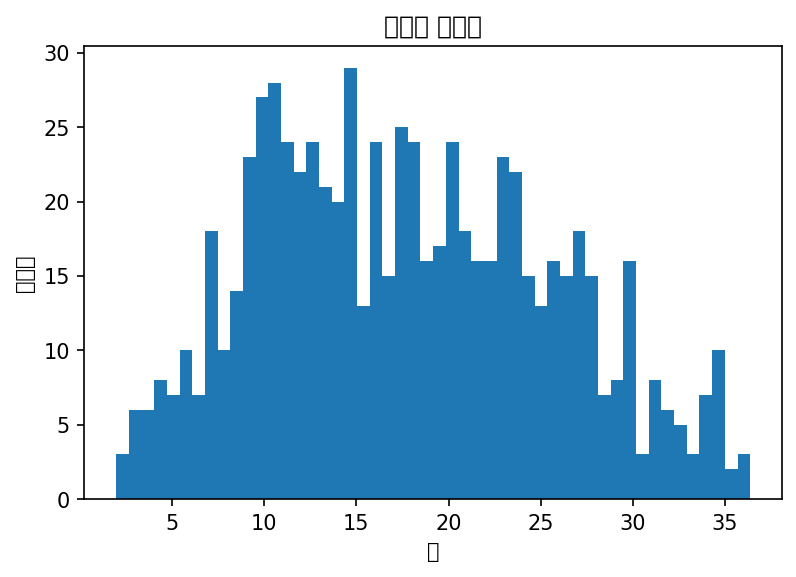

In [ ]:
# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt

# 이번 대회에서 예측하고자 하는 값인 태양광 발전량 TARGET을 확인해봅시다
plt.figure(dpi=150)
plt.title("태양광 발전량")
plt.xlabel('일')
plt.ylabel('발전량')
plt.hist(train['TARGET'], bins=50)
plt.show()

### 전체 칼럼 분포

전체 칼럼 분포를 살펴봅니다.

이번에는 시각화를 위해 `seaborn` 라이브러리를 사용해 보겠습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

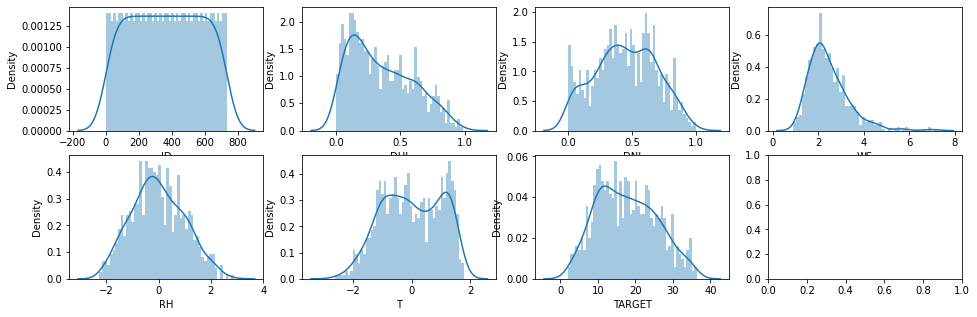

In [ ]:
# 시각화를 위한 라이브러리
import seaborn as sns

fig, ax = plt.subplots(2, train.shape[1]//2+1, figsize=(16, 5))
for idx, feature in enumerate(train.columns):
    if idx<train.shape[1]//2+1:
      sns.distplot(train[feature], ax=ax[0,idx], bins=50)
    else:
      sns.distplot(train[feature], ax=ax[1,idx-train.shape[1]//2-1], bins=50)

# II.EDA

## 1. 가설 설정

가설 설정하기 전, TARGET을 시각화하겠습니다.

I. 데이터 살펴보기 > 데이터 시각화에서는 **hist** 히스토그램으로 TARGET의 분포를 살펴보았습니다.

이번에는 **plot** 선 그래프를 통해 좀 더 자세히 확인해봅시다.

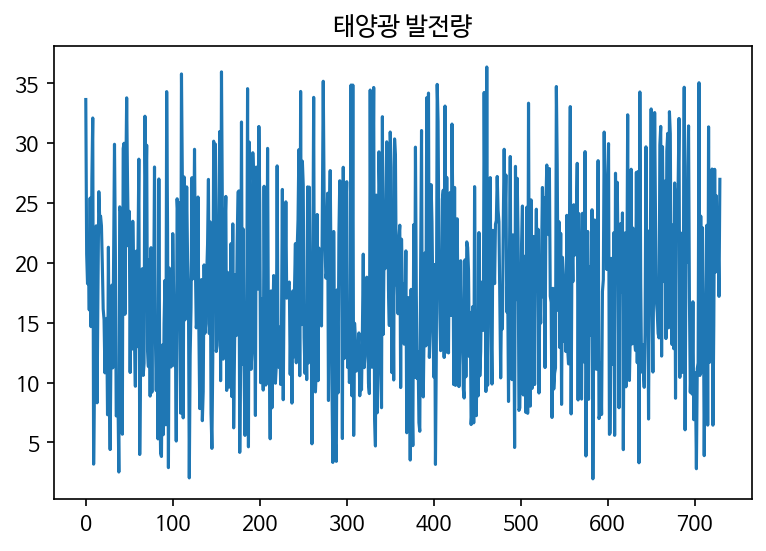

In [ ]:
import matplotlib.pyplot as plt

# 이번 대회에서 예측하고자 하는 값인 태양광 발전량 TARGET을 확인해봅시다
plt.figure(dpi=150)
plt.title("태양광 발전량")
plt.plot(train['TARGET'])
plt.show()

*태양광* 발전량이 낮은 날과 높은 날은 각각 칼럼들로부터 영향을 받지 않을까요??

그럼 발전량이 낮은 날은 10으로 높은 날은 30으로 설정하고 분석(가설 검정)을 진행하겠습니다.

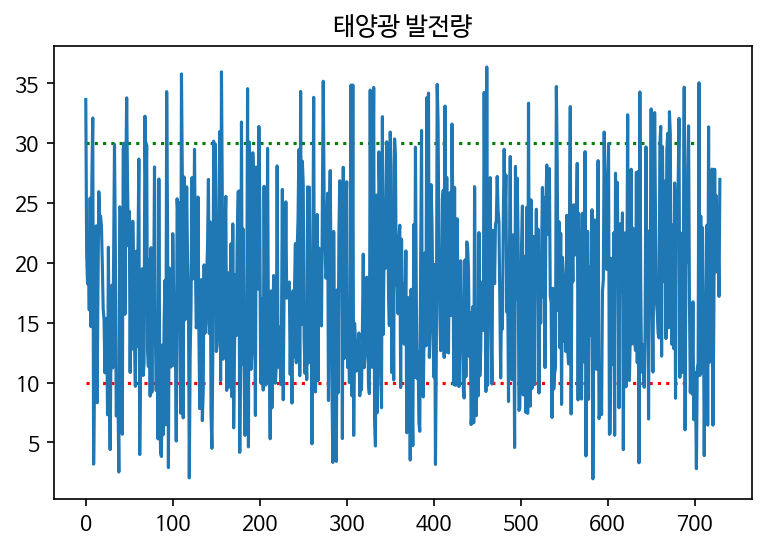

In [ ]:
import matplotlib.pyplot as plt

# 이번 대회에서 예측하고자 하는 값인 태양광 발전량 TARGET을 확인해봅시다
plt.figure(dpi=150)
plt.title("태양광 발전량")
plt.plot(train['TARGET'])
plt.hlines(y=10, xmin=0, xmax=700, color='red', linestyle='dotted') # 발전량이 낮은 날의 수평선 그리기 (10 기준)
plt.hlines(y=30, xmin=0, xmax=700, color='green', linestyle='dotted') # 발전량이 높은 날의 수평선 그리기 (30 기준)
plt.show()

### 가설

1. 발전량에는 일사량 관련 칼럼(DHI, DNI)이 많은 영향을 미칠 것이다.
2. 상대습도가 높을수록 태양광 발전량의 크기 작을 것이다.
3. 기온이 높으면 태양광 발전량의 크기가 높을 것이다.
4. 풍속은 발전량에 직접적인 영향을 미치기보다는 상대습도와 연관이 높을 것이다.

## 2. 가설 검정

### 발전량 vs 상대습도

가설 설정 부분에서 총 4가지의 가설을 세웠습니다.

이번 Baseline에서는 두 번째 가설 **"상대습도가 높을수록 태양광 발전량의 크기 작을 것이다"** 한 가지만 다루겠습니다.

- 태양광 발전량이 낮은 날 (10기준)

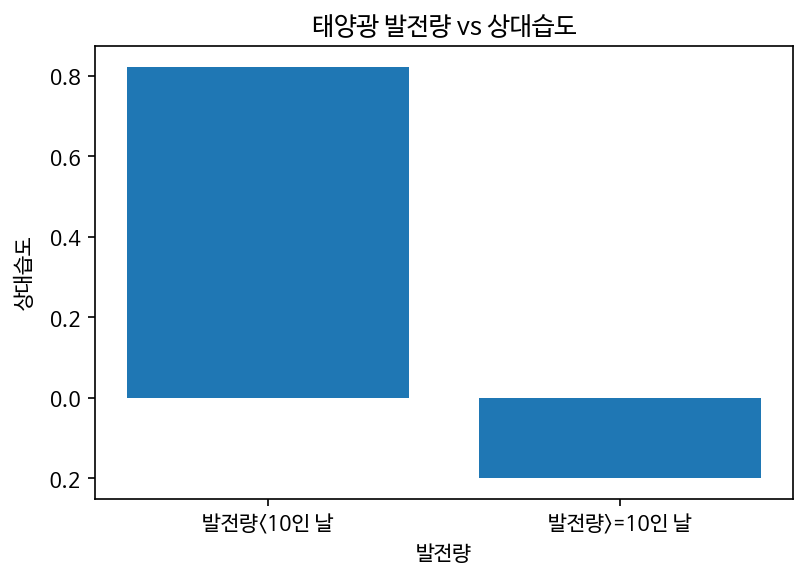

In [ ]:
# 태양광 발전량이 10미만인 날과 10이상인 날의 상대습도 평균 비교
x = ['발전량<10인 날', '발전량>=10인 날']
y = [train[train['TARGET'] < 10]['RH'].mean(), train[train['TARGET'] >= 10]['RH'].mean()]

plt.figure(dpi=150)
plt.title("태양광 발전량 vs 상대습도")
plt.xlabel('발전량')
plt.ylabel('상대습도')
plt.bar(x, y)
plt.show()

발전량이 10미만인 날은 10이상인 날보다 상대습도의 평균이 높네요!

- 태양광 발전량이 높은 날 (30기준)

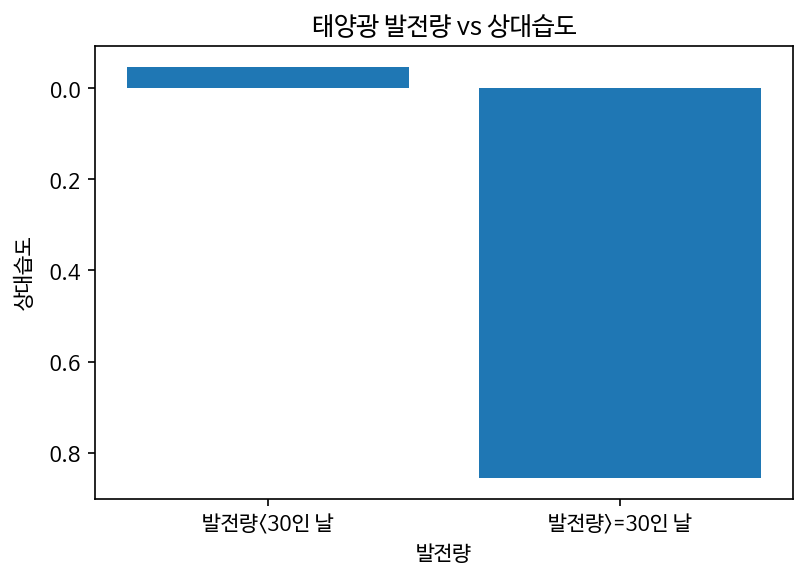

In [ ]:
# 태양광 발전량이 30미만인 날과 30이상인 날의 상대습도 평균 비교
x = ['발전량<30인 날', '발전량>=30인 날']
y = [train[train['TARGET'] < 30]['RH'].mean(), train[train['TARGET'] >= 30]['RH'].mean()]

plt.figure(dpi=150)
plt.title("태양광 발전량 vs 상대습도")
plt.xlabel('발전량')
plt.ylabel('상대습도')
plt.bar(x, y)
plt.show()

반대로 발전량이 30이상인 날은 30미만인 날보다 상대습도의 평균이 확연히 낮습니다!

## 3. Target & Feature 상관관계

### 발전량 vs 상대습도

발전량에 대한 세 구간 [10미만, 10이상 30미만, 30이상]의 상대습도 평균을 **bar** 막대 그래프로 시각화하여 간단히 발전량과 상대습도 관계를 확인했는데요.

두 변수 간의 상관 관계를 시각적으로 확인하기 위해 **scatter** 산점도 그래프를 그려보겠습니다.

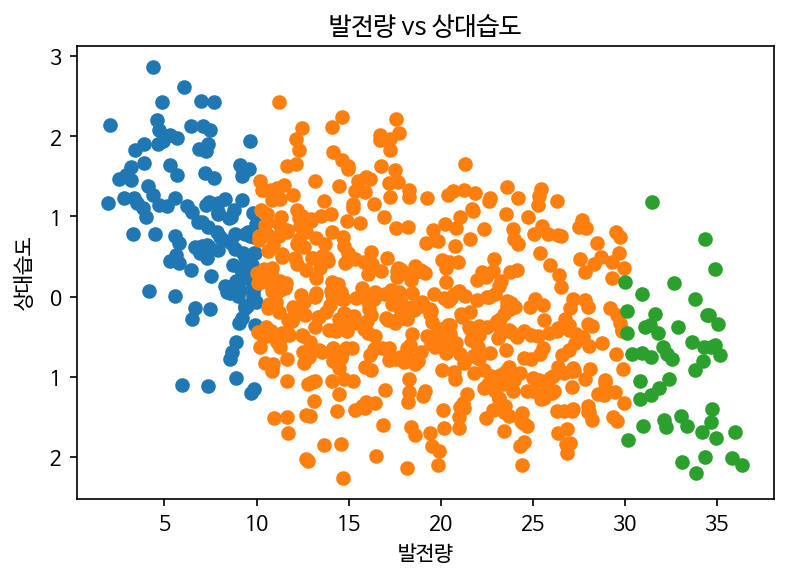

In [ ]:
# 태양광 발전량이 10미만인 날
x_0 = train.loc[train['TARGET']<10, 'TARGET']
y_0 = train.loc[train['TARGET']<10, 'RH']

# 태양광 발전량이 10이상 30미만인 날
x_1 = train.loc[(train['TARGET']>=10)&(train['TARGET']<30), 'TARGET']
y_1 = train.loc[(train['TARGET']>=10)&(train['TARGET']<30), 'RH']

# 태양광 발전량이 30이상인 날
x_2 = train.loc[train['TARGET']>=30, 'TARGET']
y_2 = train.loc[train['TARGET']>=30, 'RH']


# scatter 산점도 그래프 그리기
plt.figure(dpi=150) 

plt.title('발전량 vs 상대습도')
plt.xlabel('발전량')
plt.ylabel('상대습도')

plt.scatter(x_0, y_0)
plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)

plt.show()

전체적인 그래프가 우하향하므로 발전량과 상대습도는 **반비례 관계**에 있습니다.

**2. 상대습도가 높을수록 태양광 발전량의 크기 작을 것이다.** 는 가설은 입증되었네요!

또, 태양광 발전량을 [10미만, 10이상 30미만, 30이상] 총 3가지의 구간으로 나누어 시각화를 진행했더니 각 구간이 서로 다른 색깔로 그려져 한눈에 알아보기 좋네요.

### 전체 상관관계 확인

scatter는 그래프를 그림으로써 직관적으로 상관관계를 확인할 수 있는데요.

seaborn 라이브러리의 **heatmap**으로도 상관관계를 확인할 수 있습니다.

heatmap에서는 상관관계 점수를 제공하는데, 점수의 절대값이 높을수록 진한 색으로 그려집니다.

점수가 양수면 비례 관계, 음수면 반비례 관계임을 의미합니다.

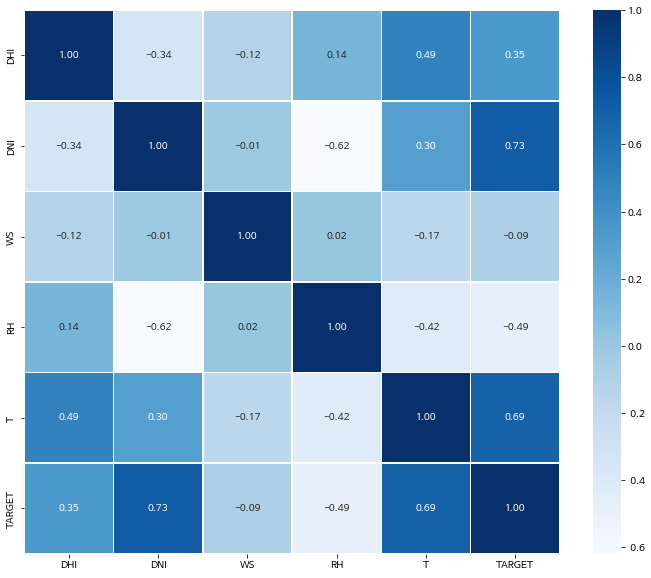

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data = train.drop(['ID'], axis=1).corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

# III. Modeling

이제 전처리가 완료된 데이터를 사용하여 분석 모델을 학습시키고 예측 결과를 만들어보겠습니다.

## 1. 모델 선택

이번 시간에는 조금 더 복잡한 모델인 랜덤 포레스트 (Random Forest) 모델을 사용하여 분석을 진행하도록 하겠습니다.

### 랜덤 포레스트란?

<div align="center">
<img src="https://user-images.githubusercontent.com/49966189/179161260-c744f039-0223-43ec-aa4d-9ff270e682b8.png">
</div>
<div align="center">
<font color=gray> By Venkata Jagannath -
https://community.tibco.com/wiki/random-forest-template-tibco-spotfirer-wiki-page </font>
</div>

랜덤 포레스트는 대표적인 앙상블(ensemble) 모델의 일종입니다. "여러 개의 트리 모델" 에 "서로 다른 데이터"를 투입하여 나온 결과를 종합하여 가장 많은 투표(Voting)를 얻은 결과를 최종 결과로 선택하는 방식으로 작동합니다.

이를 통해 과적합(Overfitting)을 방지할 수 있고, 보다 일반화된 성능을 끌어낼 수 있습니다. 

랜덤 포레스트 모델은 `sklearn` 패키지를 이용해 간단하게 사용할 수 있습니다.

우선 설정한 **모델을 선언**해 주도록 해요.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 모델 선언
model = RandomForestRegressor()

## 2. 학습/예측 

이제 선안한 모델을 사용하여 학습과 예측을 진행하겠습니다.

학습이란 모델이 데이터를 바탕으로 데이터들 사이의 관계를 파악하는 과정입니다.

예측이란 학습을 통해 파악한 데이터 사이의 관계를 이용해 새로운 데이터에 대한 값을 추측하는 것입니다.


### Feature Selection

먼저 분석에 사용할 데이터들만 추려주도록 합니다.

In [ ]:
# 분석할 의미가 없는 칼럼을 제거합니다.
train = train.drop(columns=['ID'])
test = test.drop(columns=['ID'])

# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
x_train = train.drop(columns=['TARGET'])
y_train = train['TARGET']

선택한 칼럼 확인은 **.columns**를 통해 확인할 수 있습니다.

In [ ]:
# 선택한 칼럼 확인
x_train.columns

### 모델 학습

이제 모델 학습을 시작합니다.

`sklearn`을 이용해 선언된 모델은 **`fit()`** 메소드를 이용해 간단하게 **모델을 학습** 시킬 수 있어요.

In [ ]:
# 모델 학습
model.fit(x_train,y_train)

RandomForestRegressor()

### 예측

이번엔 학습된 모델을 이용해 평가 데이터셋의 예측값을 구해봅시다.

`sklearn`을 이용해 선언된 모델은 **`predict()`** 메소드를 이용해 간단하게 **결과값을 예측**할 수 있어요.

In [ ]:
# 예측 결과값을 prediction 변수에 저장
prediction = model.predict(test)

모델 학습이 굉장히 간단하게, 또 빠르게 끝난 것을 확인할 수 있습니다.

다루는 데이터의 양이 많아지면 모델 학습이 오래 걸릴 수도 있어요!

학습된 모델을 이용해 예측한 결과값의 상위 10개의 값만 확인해볼까요?

In [ ]:
# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인 
# 미리 저장해둔 prediction 변수와 슬라이싱 기법 이용
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[1625085.7212 1561373.7851 1527921.8988 1492370.9223 1783228.9892
 1770094.7253 1701936.2472 1705981.0641  527305.6444  522308.3433]


# IV. 데이콘 제출하기


## 1. submission 파일 생성

이제 예측한 값을 **sample_submission.csv**에 넣어 제출용 파일을 생성해봅시다.

In [ ]:
# sample_submission.csv 정답파일 불러오기
sample_submission = pd.read_csv('./sample_submission.csv')

# 예측된 값을 정답파일과 병합
sample_submission['TARGET'] = prediction

# 정답파일 데이터프레임 확인
sample_submission.head()

,ID,TARGET
0,1,16.636035
1,2,30.352909
2,3,11.881543
3,4,21.659104
4,5,21.005268


In [ ]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv('submission.csv',index = False)